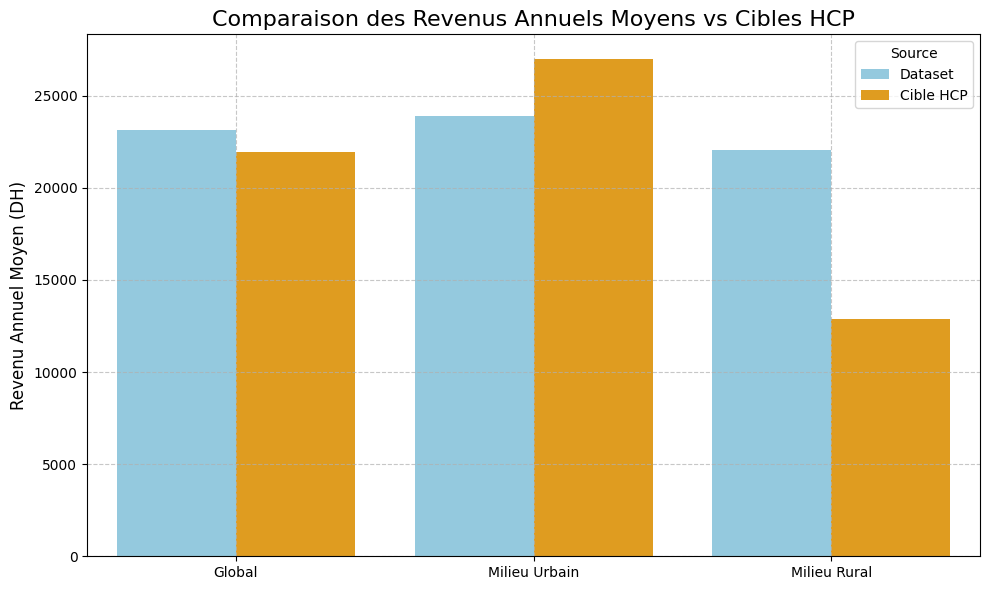

Revenus Moyens Calculés à partir du Dataset:
  Global: 23151.55 DH
  Urbain: 23878.06 DH
  Rural: 22068.93 DH


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
dataset_path = "/Users/youns/Desktop/Projects/ML/dataset_revenu_marocains_v2.csv"
try:
    data = pd.read_csv(dataset_path)
except FileNotFoundError:
    print(f"Erreur: Le fichier {dataset_path} n'a pas été trouvé.")
    exit()

# Cibles HCP
cible_revenu_global = 21949
cible_revenu_urbain = 26988
cible_revenu_rural = 12862

# Calculs à partir du dataset
revenu_moyen_global_dataset = data['Revenu_Annuel'].mean()
revenu_moyen_urbain_dataset = data[data['Milieu'] == 'Urbain']['Revenu_Annuel'].mean()
revenu_moyen_rural_dataset = data[data['Milieu'] == 'Rural']['Revenu_Annuel'].mean()

# Préparation des données pour le graphique
categories = ['Global', 'Milieu Urbain', 'Milieu Rural']
valeurs_dataset = [revenu_moyen_global_dataset, revenu_moyen_urbain_dataset, revenu_moyen_rural_dataset]
valeurs_cible = [cible_revenu_global, cible_revenu_urbain, cible_revenu_rural]

df_plot = pd.DataFrame({
    'Catégorie': categories * 2,
    'Revenu Moyen (DH)': valeurs_dataset + valeurs_cible,
    'Source': ['Dataset'] * len(categories) + ['Cible HCP'] * len(categories)
})

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Catégorie', y='Revenu Moyen (DH)', hue='Source', data=df_plot, palette={'Dataset': 'skyblue', 'Cible HCP': 'orange'})
plt.title('Comparaison des Revenus Annuels Moyens vs Cibles HCP', fontsize=16)
plt.ylabel('Revenu Annuel Moyen (DH)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

print("Revenus Moyens Calculés à partir du Dataset:")
print(f"  Global: {revenu_moyen_global_dataset:.2f} DH")
print(f"  Urbain: {revenu_moyen_urbain_dataset:.2f} DH")
print(f"  Rural: {revenu_moyen_rural_dataset:.2f} DH")

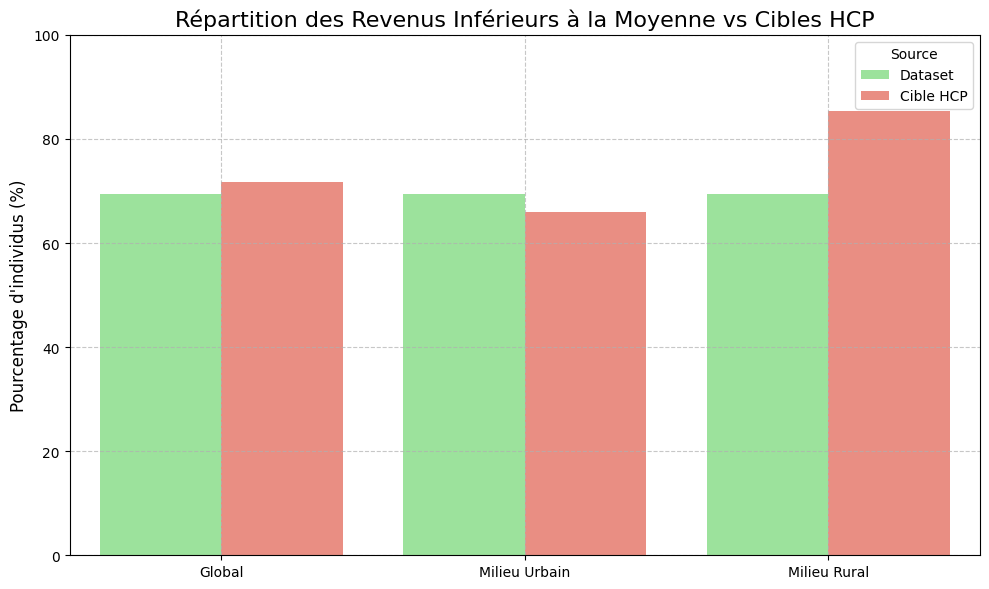


Pourcentages d'individus avec revenu inférieur à la moyenne (Dataset):
  Global: 69.44% (Moyenne globale dataset: 23151.55 DH)
  Urbain: 69.45% (Moyenne urbaine dataset: 23878.06 DH)
  Rural: 69.45% (Moyenne rurale dataset: 22068.93 DH)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
dataset_path = "/Users/youns/Desktop/Projects/ML/dataset_revenu_marocains_v2.csv"
try:
    data = pd.read_csv(dataset_path)
except FileNotFoundError:
    print(f"Erreur: Le fichier {dataset_path} n'a pas été trouvé.")
    exit()

# Cibles HCP pour la répartition (en pourcentage)
cible_pct_inf_moyenne_global = 71.8
cible_pct_inf_moyenne_urbain = 65.9 # Mise à jour de la spécification
cible_pct_inf_moyenne_rural = 85.4

# Calculs à partir du dataset

# Global
moyenne_globale_dataset = data['Revenu_Annuel'].mean()
pct_inf_moyenne_global_dataset = (data[data['Revenu_Annuel'] < moyenne_globale_dataset].shape[0] / data.shape[0]) * 100

# Urbain
data_urbain = data[data['Milieu'] == 'Urbain']
if not data_urbain.empty:
    moyenne_urbaine_dataset = data_urbain['Revenu_Annuel'].mean()
    pct_inf_moyenne_urbain_dataset = (data_urbain[data_urbain['Revenu_Annuel'] < moyenne_urbaine_dataset].shape[0] / data_urbain.shape[0]) * 100
else:
    pct_inf_moyenne_urbain_dataset = 0 # ou np.nan si vous préférez

# Rural
data_rural = data[data['Milieu'] == 'Rural']
if not data_rural.empty:
    moyenne_rurale_dataset = data_rural['Revenu_Annuel'].mean()
    pct_inf_moyenne_rural_dataset = (data_rural[data_rural['Revenu_Annuel'] < moyenne_rurale_dataset].shape[0] / data_rural.shape[0]) * 100
else:
    pct_inf_moyenne_rural_dataset = 0 # ou np.nan

# Préparation des données pour le graphique
categories = ['Global', 'Milieu Urbain', 'Milieu Rural']
valeurs_dataset_pct = [pct_inf_moyenne_global_dataset, pct_inf_moyenne_urbain_dataset, pct_inf_moyenne_rural_dataset]
valeurs_cible_pct = [cible_pct_inf_moyenne_global, cible_pct_inf_moyenne_urbain, cible_pct_inf_moyenne_rural]

df_plot_pct = pd.DataFrame({
    'Catégorie': categories * 2,
    'Pourcentage (%)': valeurs_dataset_pct + valeurs_cible_pct,
    'Source': ['Dataset'] * len(categories) + ['Cible HCP'] * len(categories)
})

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Catégorie', y='Pourcentage (%)', hue='Source', data=df_plot_pct, palette={'Dataset': 'lightgreen', 'Cible HCP': 'salmon'})
plt.title('Répartition des Revenus Inférieurs à la Moyenne vs Cibles HCP', fontsize=16)
plt.ylabel('Pourcentage d\'individus (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylim(0, 100) # Pourcentage de 0 à 100
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

print("\nPourcentages d'individus avec revenu inférieur à la moyenne (Dataset):")
print(f"  Global: {pct_inf_moyenne_global_dataset:.2f}% (Moyenne globale dataset: {moyenne_globale_dataset:.2f} DH)")
if not data_urbain.empty:
    print(f"  Urbain: {pct_inf_moyenne_urbain_dataset:.2f}% (Moyenne urbaine dataset: {moyenne_urbaine_dataset:.2f} DH)")
else:
    print("  Urbain: Pas de données pour le milieu urbain.")
if not data_rural.empty:
    print(f"  Rural: {pct_inf_moyenne_rural_dataset:.2f}% (Moyenne rurale dataset: {moyenne_rurale_dataset:.2f} DH)")
else:
    print("  Rural: Pas de données pour le milieu rural.")


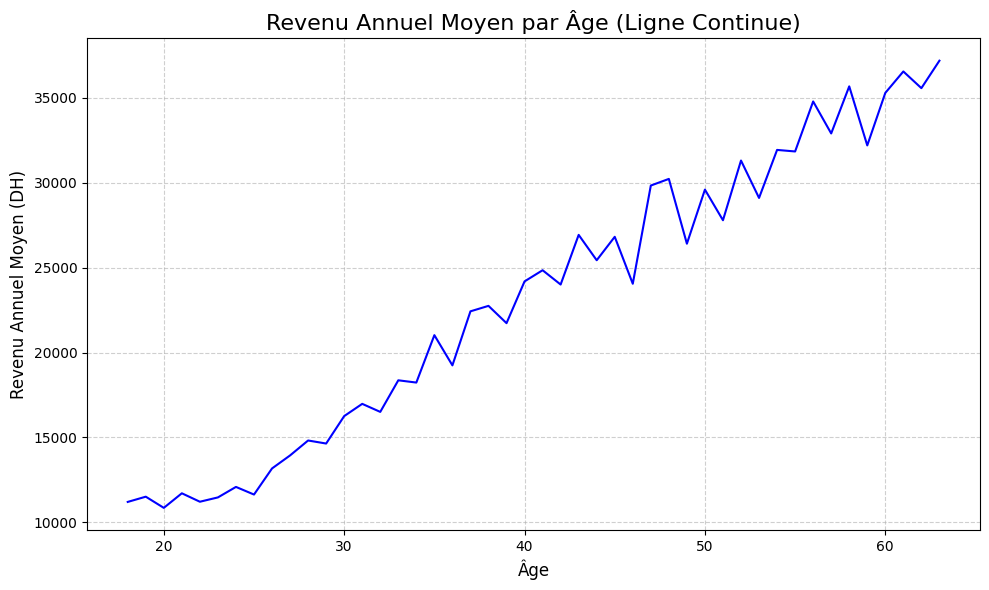

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
dataset_path = "/Users/youns/Desktop/Projects/ML/dataset_revenu_marocains_v2.csv"
data = pd.read_csv(dataset_path)

# Initialiser revenu_par_age comme un DataFrame vide pour le cas où les conditions ne sont pas remplies
revenu_par_age = pd.DataFrame({'Age': [], 'Revenu_Annuel': []})

if not data.empty and 'Age' in data.columns and data['Age'].notna().any():
    # Calculer le revenu moyen par âge initial
    revenu_moyen_initial = data.groupby('Age')['Revenu_Annuel'].mean().reset_index()

    if not revenu_moyen_initial.empty:
        min_age = 18
        max_age = 63
        
        # Créer une plage d'âge complète
        age_range_df = pd.DataFrame({'Age': range(min_age, max_age + 1)})

        # Fusionner pour inclure tous les âges
        revenu_par_age = pd.merge(age_range_df, revenu_moyen_initial, on='Age', how='left')
        
        # Interpoler les valeurs de Revenu_Annuel manquantes (méthode linéaire)
        revenu_par_age['Revenu_Annuel'] = revenu_par_age['Revenu_Annuel'].interpolate(method='linear')
        
        # Remplir les NaNs restants aux extrémités (si l'interpolation ne les couvre pas)
        # Utiliser .bfill() et .ffill() directement et réassigner
        revenu_par_age['Revenu_Annuel'] = revenu_par_age['Revenu_Annuel'].bfill() # Remplissage arrière
        revenu_par_age['Revenu_Annuel'] = revenu_par_age['Revenu_Annuel'].ffill() # Remplissage avant
    # Si revenu_moyen_initial est vide, revenu_par_age reste le DataFrame vide initialisé plus haut.
# Si les conditions initiales sur 'data' ne sont pas remplies, revenu_par_age reste vide.


# Créer le diagramme en ligne continu
plt.figure(figsize=(10, 6))

if not revenu_par_age.empty and 'Revenu_Annuel' in revenu_par_age.columns and revenu_par_age['Revenu_Annuel'].notna().any():
    sns.lineplot(data=revenu_par_age, x='Age', y='Revenu_Annuel', marker='', color='blue') # marker='' pour une ligne sans marqueurs
else:
    # Afficher un message si pas de données valides à tracer
    ax = plt.gca()
    ax.text(0.5, 0.5, "Pas de données d'âge valides à afficher.", 
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Ajouter des titres et labels
plt.title("Revenu Annuel Moyen par Âge (Ligne Continue)", fontsize=16)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Revenu Annuel Moyen (DH)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()

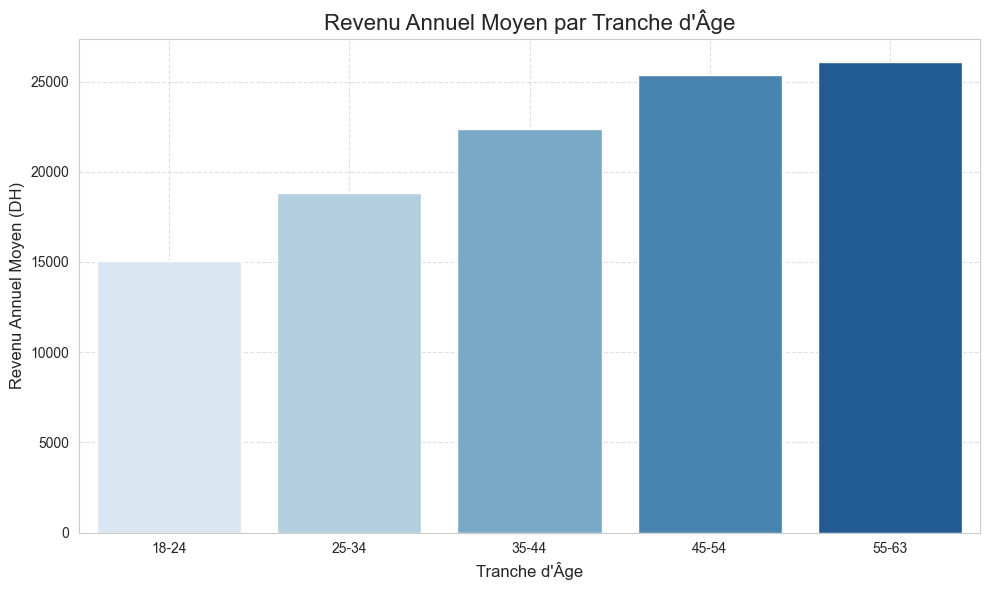

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
dataset_path = "/Users/youns/Desktop/Projects/ML/dataset_revenu_marocains.csv"
data = pd.read_csv(dataset_path)

# Créer des tranches d'âge
bins = [18, 25, 35, 45, 55, 63]
labels = ['18-24', '25-34', '35-44', '45-54', '55-63']
data['Tranche_Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculer le revenu moyen par tranche d'âge
# Adopter le futur comportement par défaut pour 'observed'
revenu_moyen = data.groupby('Tranche_Age', observed=True)['Revenu_Annuel'].mean().reset_index()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
# Assigner 'x' à 'hue' et désactiver la légende pour utiliser 'palette' correctement
sns.barplot(data=revenu_moyen, x='Tranche_Age', y='Revenu_Annuel', hue='Tranche_Age', palette='Blues', legend=False)

# Ajouter des titres et labels
plt.title("Revenu Annuel Moyen par Tranche d'Âge", fontsize=16)
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Revenu Annuel Moyen (DH)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.tight_layout()
plt.show()

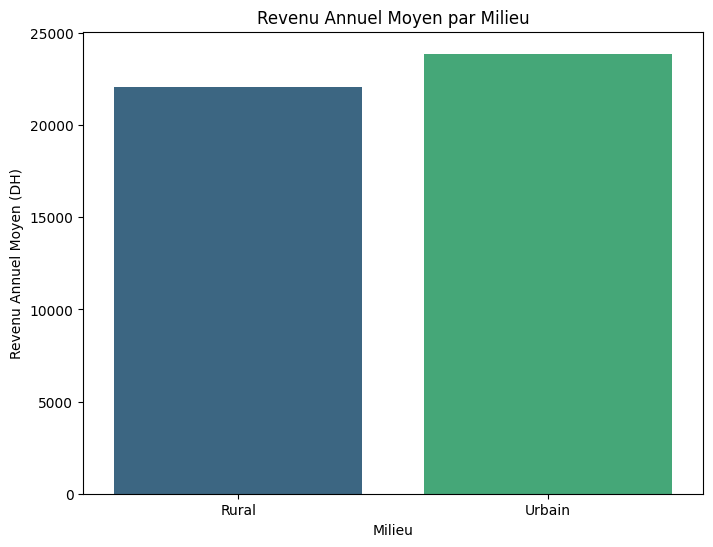

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Calculer le revenu annuel moyen par milieu
moyennes = df.groupby("Milieu")["Revenu_Annuel"].mean().reset_index()

# Créer un diagramme à barres
plt.figure(figsize=(8, 6))
sns.barplot(x="Milieu", y="Revenu_Annuel", data=moyennes, palette="viridis", hue="Milieu", dodge=False)
plt.title("Revenu Annuel Moyen par Milieu")
plt.xlabel("Milieu")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.show()

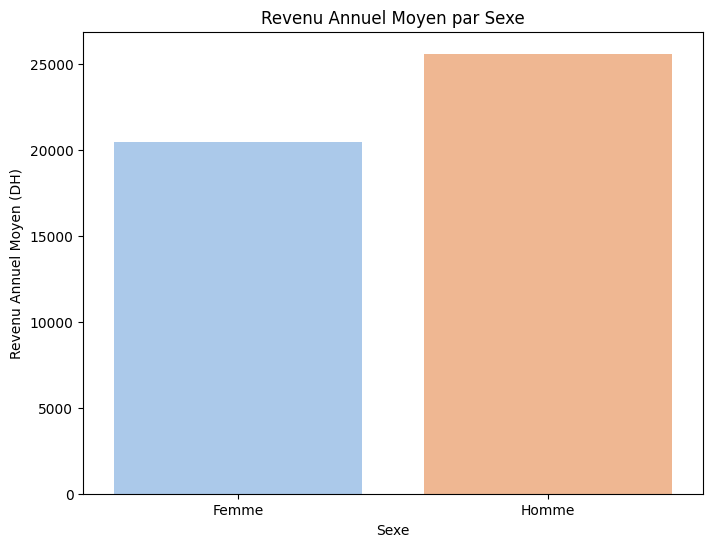

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Calculer le revenu annuel moyen par sexe
revenu_par_sexe = df.groupby("Sexe")["Revenu_Annuel"].mean().reset_index()

# Créer un diagramme à barres
plt.figure(figsize=(8, 6))
sns.barplot(x="Sexe", y="Revenu_Annuel", data=revenu_par_sexe, palette="pastel", hue="Sexe")
plt.title("Revenu Annuel Moyen par Sexe")
plt.xlabel("Sexe")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.show()

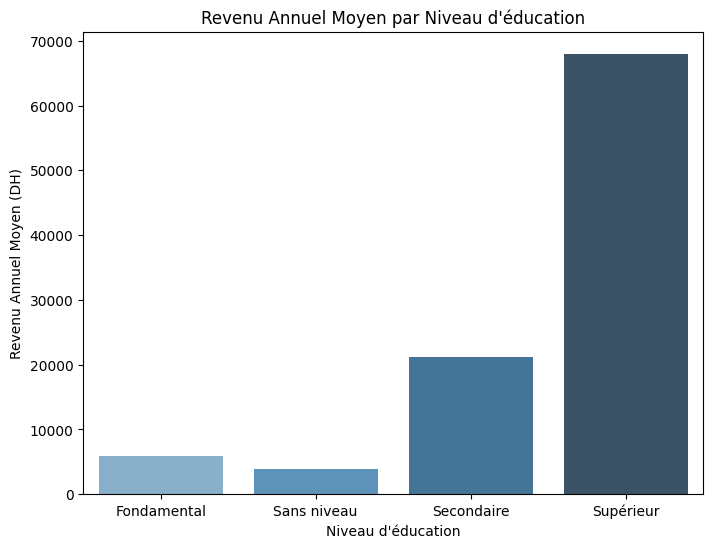

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Calculer le revenu annuel moyen par niveau d'éducation
moyennes_edu = df.groupby("Niveau_education")["Revenu_Annuel"].mean().reset_index()

# Créer un diagramme à barres
plt.figure(figsize=(8, 6))
sns.barplot(x="Niveau_education", y="Revenu_Annuel", data=moyennes_edu,
            hue="Niveau_education", palette="Blues_d", dodge=False)
plt.title("Revenu Annuel Moyen par Niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend([], [], frameon=False)  # Désactive la légende pour éviter l'avertissement
plt.show()

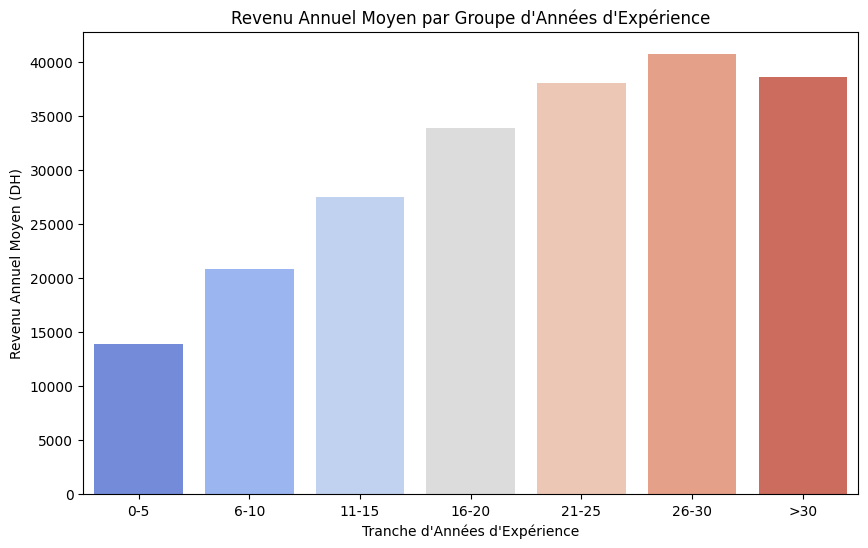

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Création de groupes pour les années d'expérience
max_exp = df['Annees_experience'].max()
bins = [0, 5, 10, 15, 20, 25, 30, max_exp]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', f'>{30}']
df['Groupe_experience'] = pd.cut(df['Annees_experience'], bins=bins, labels=labels, include_lowest=True)

# Calculer le revenu annuel moyen par groupe d'expérience en spécifiant observed pour éviter le warning
moyennes_exp = df.groupby("Groupe_experience", observed=True)["Revenu_Annuel"].mean().reset_index()

# Créer le diagramme à barres en assignant la variable x à hue et en désactivant la légende
plt.figure(figsize=(10, 6))
sns.barplot(x="Groupe_experience", y="Revenu_Annuel", data=moyennes_exp,
            hue="Groupe_experience", palette="coolwarm", dodge=False)
plt.title("Revenu Annuel Moyen par Groupe d'Années d'Expérience")
plt.xlabel("Tranche d'Années d'Expérience")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend([], [], frameon=False)
plt.show()

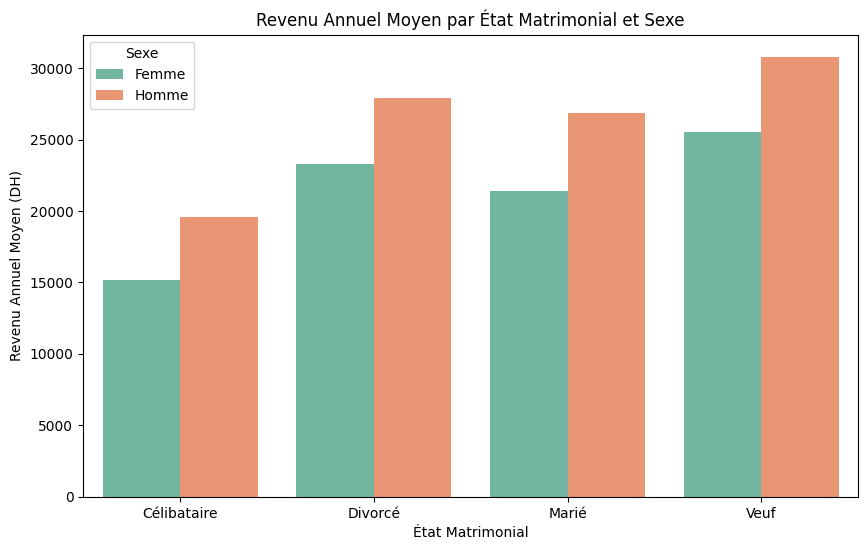

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Calculer le revenu annuel moyen par état matrimonial et sexe (en spécifiant observed pour éviter le warning)
moyennes_etat_sexe = df.groupby(["Etat_matrimonial", "Sexe"], observed=True)["Revenu_Annuel"].mean().reset_index()

# Créer le diagramme à barres avec 'Etat_matrimonial' en x et 'Sexe' en hue
plt.figure(figsize=(10, 6))
sns.barplot(x="Etat_matrimonial", y="Revenu_Annuel", hue="Sexe", data=moyennes_etat_sexe,
            palette="Set2", dodge=True)
plt.title("Revenu Annuel Moyen par État Matrimonial et Sexe")
plt.xlabel("État Matrimonial")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend(title="Sexe")
plt.show()

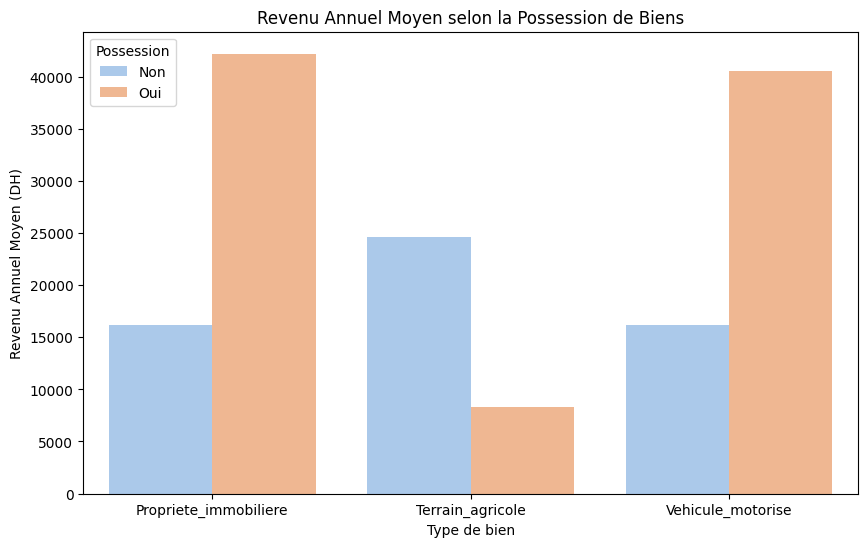

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Colonnes de possession de biens
biens = ["Propriete_immobiliere", "Vehicule_motorise", "Terrain_agricole"]

# Transformer en format long pour faciliter l'analyse
df_long = df.melt(id_vars=["Revenu_Annuel"], value_vars=biens, 
                  var_name="Type_de_bien", value_name="Possession")

# Calculer le revenu annuel moyen par type de bien et possession
revenu_biens = df_long.groupby(["Type_de_bien", "Possession"], observed=True)["Revenu_Annuel"].mean().reset_index()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(x="Type_de_bien", y="Revenu_Annuel", hue="Possession", data=revenu_biens,
            palette="pastel", dodge=True)
plt.title("Revenu Annuel Moyen selon la Possession de Biens")
plt.xlabel("Type de bien")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend(title="Possession")
plt.show()

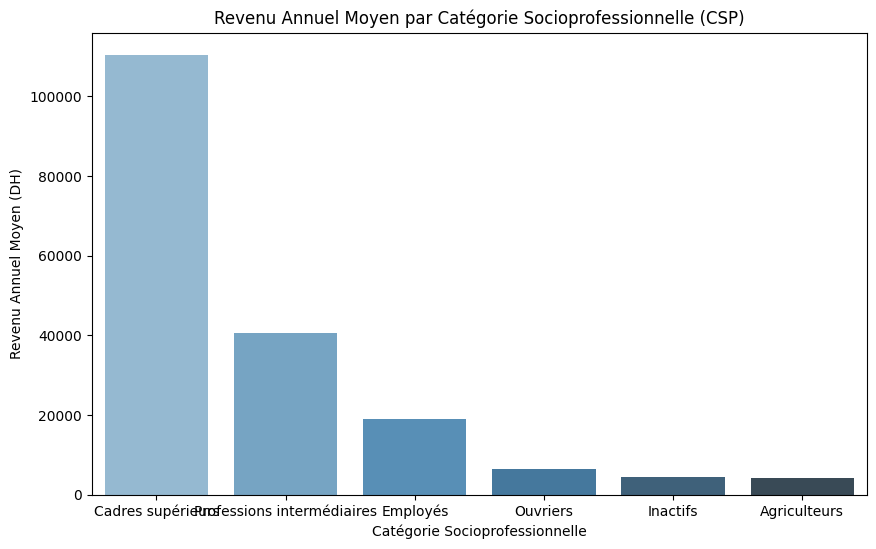

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# Calculer le revenu annuel moyen par CSP et trier du plus haut au plus bas revenu
moyennes_csp = df.groupby("CSP", observed=True)["Revenu_Annuel"].mean().reset_index()
moyennes_csp = moyennes_csp.sort_values("Revenu_Annuel", ascending=False)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(x="CSP", y="Revenu_Annuel", data=moyennes_csp, palette="Blues_d", hue="CSP")
plt.title("Revenu Annuel Moyen par Catégorie Socioprofessionnelle (CSP)")
plt.xlabel("Catégorie Socioprofessionnelle")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.show()

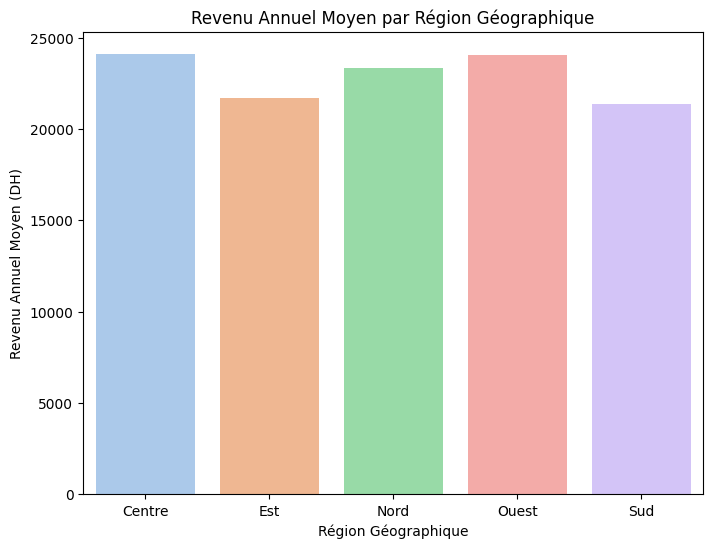

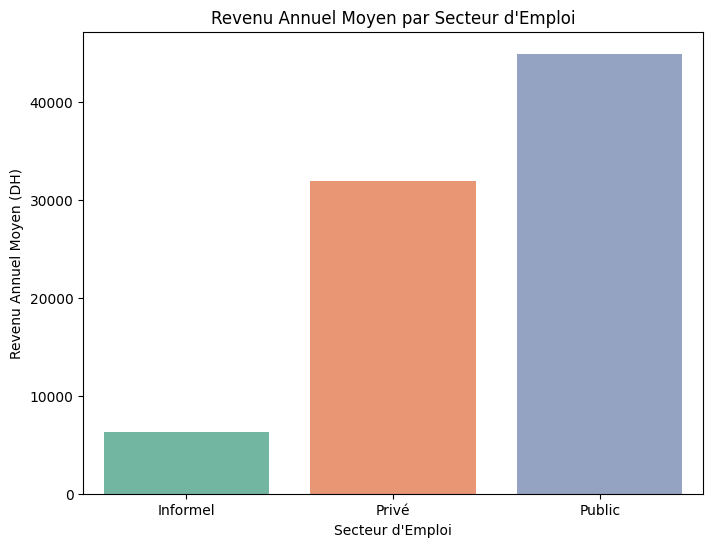

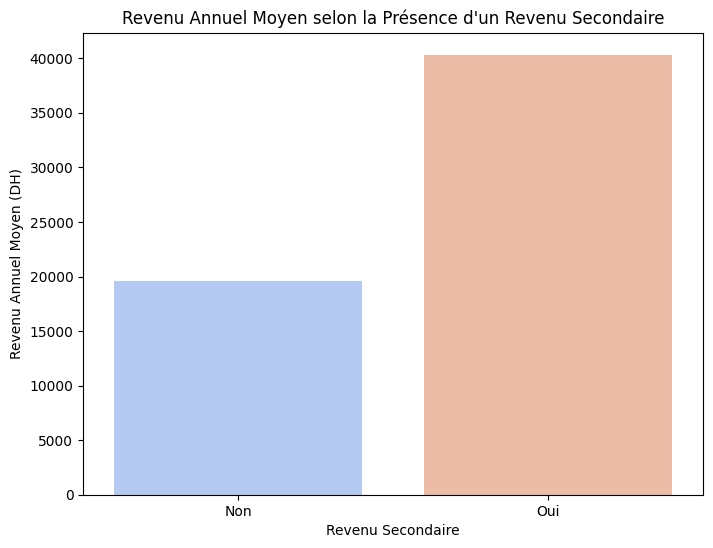

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset généré
df = pd.read_csv("dataset_revenu_marocains_v2.csv")

# 1. Diagramme : Revenu Annuel Moyen par Région Géographique
moyennes_region = df.groupby("Region_geographique", observed=True)["Revenu_Annuel"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Region_geographique", y="Revenu_Annuel", 
            data=moyennes_region, hue="Region_geographique", palette="pastel", dodge=False)
plt.title("Revenu Annuel Moyen par Région Géographique")
plt.xlabel("Région Géographique")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend([], [], frameon=False)  # Désactive la légende pour éviter l'avertissement
plt.show()


# 2. Diagramme : Revenu Annuel Moyen par Secteur d'Emploi
# Pour éviter les NaN, on retire les enregistrements sans secteur d'emploi
df_secteur = df[df["Secteur_emploi"].notna()]
moyennes_secteur = df_secteur.groupby("Secteur_emploi", observed=True)["Revenu_Annuel"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Secteur_emploi", y="Revenu_Annuel", 
            data=moyennes_secteur, hue="Secteur_emploi", palette="Set2", dodge=False)
plt.title("Revenu Annuel Moyen par Secteur d'Emploi")
plt.xlabel("Secteur d'Emploi")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend([], [], frameon=False)
plt.show()


# 3. Diagramme : Revenu Annuel Moyen selon la Présence d'un Revenu Secondaire
moyennes_secondaire = df.groupby("Revenu_secondaire", observed=True)["Revenu_Annuel"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Revenu_secondaire", y="Revenu_Annuel", 
            data=moyennes_secondaire, hue="Revenu_secondaire", palette="coolwarm", dodge=False)
plt.title("Revenu Annuel Moyen selon la Présence d'un Revenu Secondaire")
plt.xlabel("Revenu Secondaire")
plt.ylabel("Revenu Annuel Moyen (DH)")
plt.legend([], [], frameon=False)
plt.show()

NameError: name 'y_train' is not defined

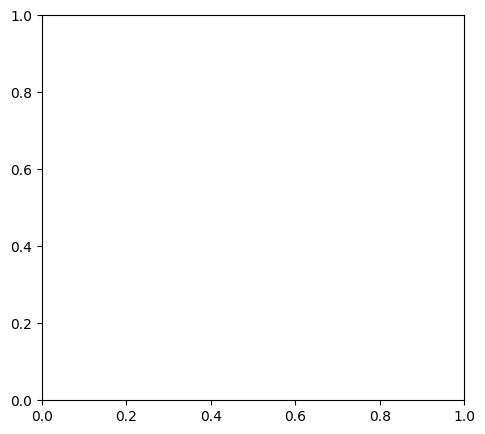

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution de y_train AVANT transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True)
plt.title("Distribution de y_train (Revenu Annuel) AVANT transformation")
plt.xlabel("Revenu Annuel")
plt.ylabel("Fréquence")

# Application de la transformation log1p
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Visualisation de la distribution de y_train APRES transformation
plt.subplot(1, 2, 2)
sns.histplot(y_train_transformed, kde=True, color='green')
plt.title("Distribution de y_train_transformed (log(1+Revenu)) APRES transformation")
plt.xlabel("log(1 + Revenu Annuel)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

print("\n--- Aperçu de y_train_transformed (quelques valeurs) ---")
print(y_train_transformed.head())